In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 210MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [7]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [9]:
model = Sequential()

In [10]:
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
conv_base.trainable = False

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [14]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
def process(image, label):
  image = tensorflow.cast(image/255, tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 42s 60ms/step - loss: 0.2719 - accuracy: 0.8856 - val_loss: 0.2329 - val_accuracy: 0.8992
Epoch 2/10
625/625 [==============================] - 28s 44ms/step - loss: 0.1900 - accuracy: 0.9219 - val_loss: 0.2053 - val_accuracy: 0.9144
Epoch 3/10
625/625 [==============================] - 33s 52ms/step - loss: 0.1618 - accuracy: 0.9326 - val_loss: 0.2713 - val_accuracy: 0.8880
Epoch 4/10
625/625 [==============================] - 30s 47ms/step - loss: 0.1369 - accuracy: 0.9445 - val_loss: 0.2211 - val_accuracy: 0.9138
Epoch 5/10
625/625 [==============================] - 30s 47ms/step - loss: 0.1107 - accuracy: 0.9563 - val_loss: 0.2332 - val_accuracy: 0.9146
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 0.0855 - accuracy: 0.9677 - val_loss: 0.2664 - val_accuracy: 0.9108
Epoch 7/10
625/625 [==============================] - 34s 53ms/step - loss: 0.0665 - accuracy: 0.9755 - val_loss: 0.2829 - val_accuracy:

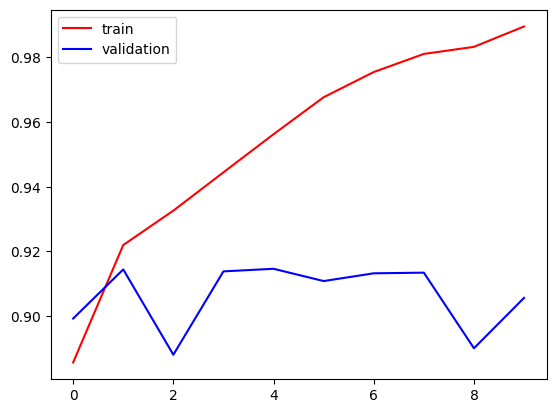

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend(())
plt.show()

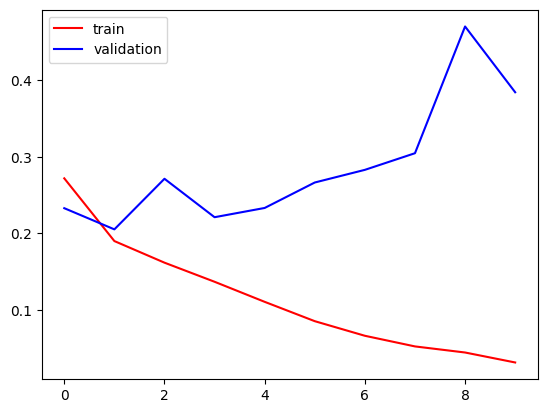

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

In [23]:
test_img = cv2.imread('/content/download (1).jpeg')

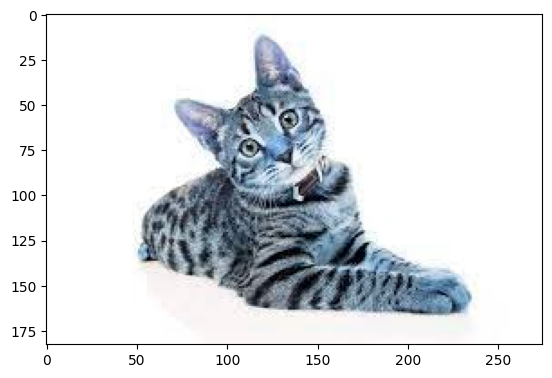

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(183, 275, 3)

In [29]:
test_img = cv2.resize(test_img,(150,150))

In [30]:
test_input = test_img.reshape((1,150,150,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 1s 506ms/step


array([[0.]], dtype=float32)

In [32]:
test_img = cv2.imread('/content/download.jpeg')

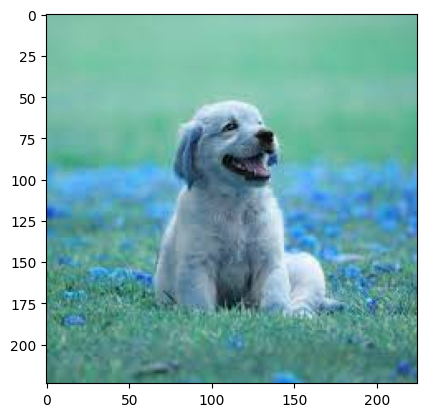

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(224, 225, 3)

In [35]:
test_img = cv2.resize(test_img,(150,150))

In [36]:
test_input = test_img.reshape((1,150,150,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)